In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import qutip as qtp
%matplotlib inline
%matplotlib widget 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [24]:
wo=1 #qubit frequencies
sm1=qtp.tensor(qtp.qeye(2),qtp.destroy(2))
sm2=qtp.tensor(qtp.destroy(2),qtp.qeye(2))
gamma=0.05 #decay for the 11 and 22 rate
beta=0.9 #fraction of the emitted captured by propagated mode times exponential
#of minus the saparation of the qubit by the plasmon length
kd=2*np.pi
g12=gamma/2*beta*np.sin(kd)
gamma12=gamma*beta*np.cos(kd)
tlist=np.linspace(0,200,1000)

Now we define the Hamiltonian: (I will use units such that $\hbar$ =1)

Also, I will define the Liouvillian, adding manually the Linblad terms as it is not as simple as in other calculations, here we have mixed terms.

In [25]:
H=wo*(sm1.dag()*sm1+sm2.dag()*sm2)+g12*(sm1.dag()*sm2+sm2.dag()*sm1)
lin11=qtp.lindblad_dissipator(sm1)
lin22=qtp.lindblad_dissipator(sm2)
lin12=qtp.lindblad_dissipator(sm1,sm2)
lin21=qtp.lindblad_dissipator(sm2,sm1)
L=qtp.liouvillian(H)+gamma*(lin11+lin22)+gamma12*(lin12+lin21)

Now I will run the dynamics of each state, including the mixture of states.

In [26]:
psi_i=qtp.tensor(qtp.basis(2,1),qtp.basis(2,0))
rhoev=qtp.mesolve(L,psi_i,tlist)

In [27]:
C=[]
for n in range(len(tlist)):
    C.append(qtp.concurrence(rhoev.states[n]))

Text(0, 0.5, 'Concurrence')

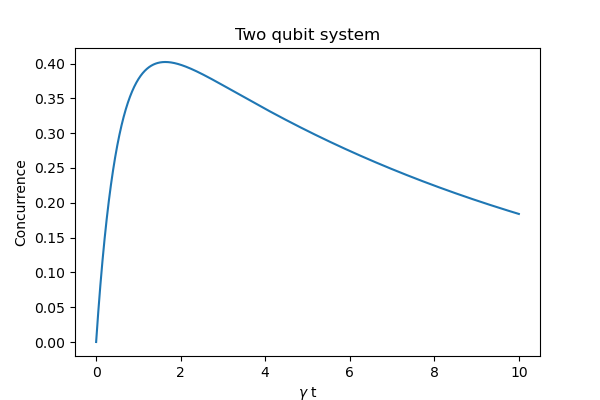

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(gamma*tlist,C)
plt.title("Two qubit system")
plt.xlabel("$\gamma$ t")
plt.ylabel("Concurrence")

In [29]:
gammap=0.05 #decay for the 11 and 22 rate
g12p=gammap*5
gamma12p=0
Hp=wo*(sm1.dag()*sm1+sm2.dag()*sm2)+g12p*(sm1.dag()*sm2+sm2.dag()*sm1)
lin11p=qtp.lindblad_dissipator(sm1)
lin22p=qtp.lindblad_dissipator(sm2)
lin12p=qtp.lindblad_dissipator(sm1,sm2)
lin21p=qtp.lindblad_dissipator(sm2,sm1)
Lp=qtp.liouvillian(Hp)+gammap*(lin11p+lin22p)+gamma12p*(lin12p+lin21p)

In [30]:
psi_ip=qtp.tensor(qtp.basis(2,1),qtp.basis(2,0))
rhoevp=qtp.mesolve(Lp,psi_ip,tlist)
Cp=[]
for n in range(len(tlist)):
    Cp.append(qtp.concurrence(rhoevp.states[n]))

Text(0, 0.5, 'Concurrence')

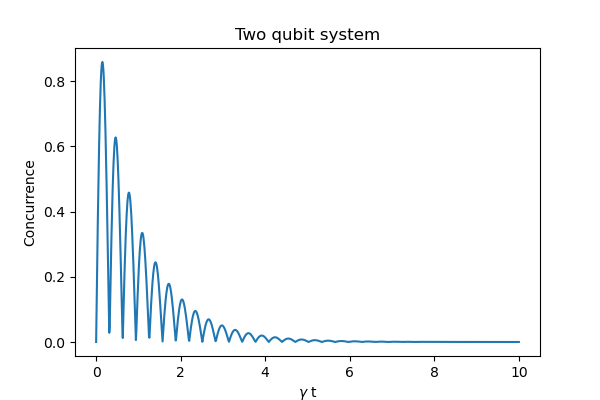

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(gamma*tlist,Cp)
plt.title("Two qubit system")
plt.xlabel("$\gamma$ t")
plt.ylabel("Concurrence")

**What would be the interpretation of this figure??**

In this case we reach a state such that it is more or less one of the two basis states but there is a huge oscilatory behaviour

Text(0, 0.5, 'Concurrence')

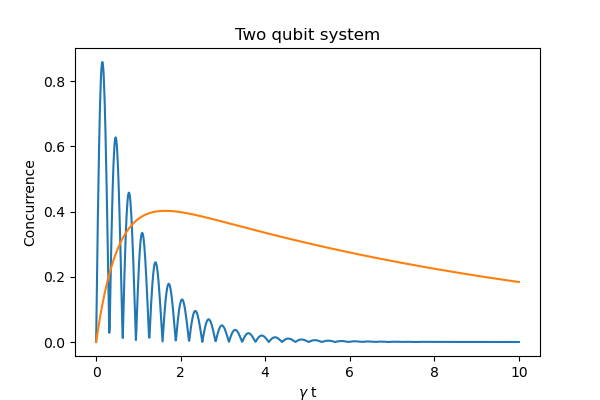

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(gamma*tlist,Cp,gamma*tlist,C)
plt.title("Two qubit system")
plt.xlabel("$\gamma$ t")
plt.ylabel("Concurrence")

In the second part of the simulation, both qubits will be pumped by an external laser. Per usual, we will be interested in the study of the steady state.

In order to introduce the coherent pumping (laser) into the system, we must add the following term to the Hamiltonian (bear in mind it must be in the rotating frame, to avoid the time dependency):

$H_{add}=\sum_i \hbar\Omega_i (\sigma_i^{\dagger}+\sigma_i)$

So the total Hamiltonian in the rotating frame should become:

$H_{total}=\hbar(\omega_o-\omega_L)\sum_i \sigma_i^{\dagger}\sigma_i+g_{12}(\sigma_1^{\dagger}\sigma_2+\sigma_2^{\dagger}\sigma_1)+\sum_i \hbar\Omega_i (\sigma_i^{\dagger}+\sigma_i)$

However, for sufficiently separated qubits, we can modulate the steady state by acting independently and resonantly ($\omega_o=\omega_L$) on each qubit with a laser beam of Rabi Frequency $\Omega_i$

In [59]:
betapump=0.94
L=2e-6 #cavity length
lambdapl=640e-9
k=2*np.pi/lambdapl
d=np.linspace(0.5*640e-9,1.5*640e-9,400)
g12new=gamma/2*betapump*np.exp(-d/(2*L))*np.sin(k*d)
gamma12new=gamma*betapump*np.exp(-d/(2*L))*np.cos(k*d)

And we redefine the Hamiltonian, thus the Liouvillian

In [68]:
omega1=0.15*gamma
omega2=0
omega1p=0.1*gamma
omega2p=0.1*gamma
omega1pp=0.1*gamma
omega2pp=-0.1*gamma
Lpump=[]
Lpumpp=[]
Lpumppp=[]
for n in range(len(d)):
    Hpump=g12new[n]*(sm1.dag()*sm2+sm2.dag()*sm1)+omega1*(sm1.dag()+sm1)+omega2*(sm2.dag()+sm2)
    lin11=qtp.lindblad_dissipator(sm1)
    lin22=qtp.lindblad_dissipator(sm2)
    lin12=qtp.lindblad_dissipator(sm1,sm2)
    lin21=qtp.lindblad_dissipator(sm2,sm1)
    Lpump.append(qtp.liouvillian(Hpump)+gamma*(lin11+lin22)+gamma12new[n]*(lin12+lin21))
    Hpumpp=g12new[n]*(sm1.dag()*sm2+sm2.dag()*sm1)+omega1p*(sm1.dag()+sm1)+omega2p*(sm2.dag()+sm2)
    Lpumpp.append(qtp.liouvillian(Hpumpp)+gamma*(lin11+lin22)+gamma12new[n]*(lin12+lin21))
    Hpumppp=g12new[n]*(sm1.dag()*sm2+sm2.dag()*sm1)+omega1pp*(sm1.dag()+sm1)+omega2pp*(sm2.dag()+sm2)
    Lpumppp.append(qtp.liouvillian(Hpumppp)+gamma*(lin11+lin22)+gamma12new[n]*(lin12+lin21))

Steady State Calculation:


In [69]:
Concurrencedist=[]
Concurrencedistp=[]
Concurrencedistpp=[]
for r in range(len(d)):
    Concurrencedist.append(qtp.concurrence(qtp.steadystate(Lpump[r])))
    Concurrencedistp.append(qtp.concurrence(qtp.steadystate(Lpumpp[r])))
    Concurrencedistpp.append(qtp.concurrence(qtp.steadystate(Lpumppp[r])))

Text(0, 0.5, 'Concurrence')

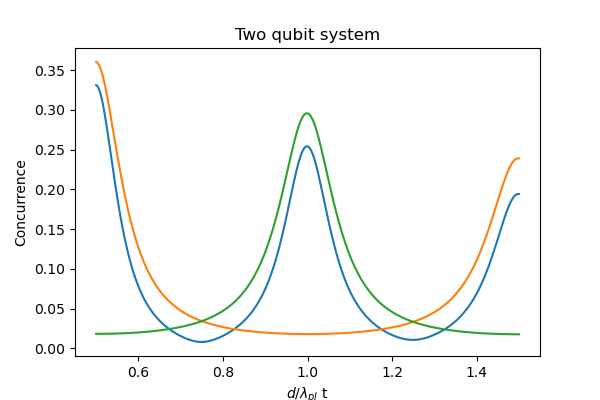

In [70]:
plt.figure(figsize=(6, 4))
plt.plot(d/lambdapl,Concurrencedist,d/lambdapl,Concurrencedistp,d/lambdapl,Concurrencedistpp)
plt.title("Two qubit system")
plt.xlabel("$d/\lambda_{pl}$ t")
plt.ylabel("Concurrence")

200